In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
old = pd.read_csv("regression_data.csv")
old.head()

7129300520 10/13/14  3     1  1180    5650  1.1  0  0.1  3.1   7  1180.1  \
0  6414100192  12/9/14  3  2.25  2570    7242  2.0  0    0    3   7    2170   
1  5631500400  2/25/15  2  1.00   770   10000  1.0  0    0    3   6     770   
2  2487200875  12/9/14  4  3.00  1960    5000  1.0  0    0    5   7    1050   
3  1954400510  2/18/15  3  2.00  1680    8080  1.0  0    0    3   8    1680   
4  7237550310  5/12/14  4  4.50  5420  101930  1.0  0    0    3  11    3890   

    0.2  1955   0.3  98178  47.5112  -122.257  1340  5650.1   221900  
0   400  1951  1991  98125  47.7210  -122.319  1690    7639   538000  
1     0  1933     0  98028  47.7379  -122.233  2720    8062   180000  
2   910  1965     0  98136  47.5208  -122.393  1360    5000   604000  
3     0  1987     0  98074  47.6168  -122.045  1800    7503   510000  
4  1530  2001     0  98053  47.6561  -122.005  4760  101930  1230000

In [3]:
# 

In [4]:
reg = pd.read_csv("regression_data.csv", names = ["id", "date", "bedrooms", "bathrooms", "sqft_living", 
                                                 "sqft_lot", "floors", "waterfront", "view","condition",
                                                 "grade", "sqft_above", "sqft_basement", "yr_built", 
                                                 "yr_renovated", "zipcode","lat","long","sqft_living15",
                                                 "sqft_lot15", "price"], header = None)
reg.head()

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   
3  2487200875   12/9/14         4       3.00         1960      5000     1.0   
4  1954400510   2/18/15         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

In [5]:
reg.shape

(21597, 21)

In [6]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [7]:
reg.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
reg = reg.drop(["id","lat","long"], axis=1)
reg.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  10/13/14         3       1.00         1180      5650     1.0           0   
1   12/9/14         3       2.25         2570      7242     2.0           0   
2   2/25/15         2       1.00          770     10000     1.0           0   
3   12/9/14         4       3.00         1960      5000     1.0           0   
4   2/18/15         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  
0    98178           1340        5650  221900  
1    98125           1690        7639  538000  
2    98028           2720        8062  180000  
3    98136           1360        5000  604000  
4    98074           1800        7503  510000

In [9]:
reg["date"] = pd.to_datetime(reg["date"], format='%m/%d/%y')

In [10]:
reg.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 2014-10-13         3       1.00         1180      5650     1.0           0   
1 2014-12-09         3       2.25         2570      7242     2.0           0   
2 2015-02-25         2       1.00          770     10000     1.0           0   
3 2014-12-09         4       3.00         1960      5000     1.0           0   
4 2015-02-18         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  
0    98178           1340        5650  221900  
1    98125           1690        7639  538000  
2    98028           2720        8062  180000  
3    98136           1360        5000  604000  
4    98074           1800        7503  510000

In [11]:
reg['year'] = reg['date'].dt.year
reg['month'] = reg['date'].dt.month
reg['day'] = reg['date'].dt.day
reg.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 2014-10-13         3       1.00         1180      5650     1.0           0   
1 2014-12-09         3       2.25         2570      7242     2.0           0   
2 2015-02-25         2       1.00          770     10000     1.0           0   
3 2014-12-09         4       3.00         1960      5000     1.0           0   
4 2015-02-18         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  
0    98178           1340        5650  221900  2014     10   13  
1    98125           1690        7639  538000  2014     12    9  
2    98028           2720        8062  180000  2015      2   25  
3    98136           1360        5000  604000  2014     12    9  
4    98074           1800        7503  510000  2015      2   18

In [12]:
reg = reg.drop(["date"], axis=1)
reg.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  
0    98178           1340        5650  221900  2014     10   13  
1    98125           1690        7639  538000  2014     12    9  
2    98028           2720        8062  180000  2015      2   25  
3    98136           1360        5000  604000  2014     12    9  
4    98074           1800        7503  510000  2015      2   18

In [13]:
reg.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  21597.000000   
mean       3.373200      2.115826   2080.321850  1.509941e+04      1.494096   
std        0.926299      0.768984    918.106125  4.141264e+04      0.539683   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068500e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       0.007547      0.234292      3.409825      7.657915   1788.596842   
std        0.086549      0.766390      0.650546      1.173200    827.759761   
min        0.000000      0.000000      1.000000      3.000000    370.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2210.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated       zipcode  sqft_living15  \
count   21597.000000  21597.000000  21597.000000  21597.000000   21597.000000   
mean      291.725008   1970.999676     84.464787  98077.951845    1986.620318   
std       442.667800     29.375234    401.821438     53.513072     685.230472   
min         0.000000   1900.000000      0.000000  98001.000000     399.000000   
25%         0.000000   1951.000000      0.000000  98033.000000    1490.000000   
50%         0.000000   1975.000000      0.000000  98065.000000    1840.000000   
75%       560.000000   1997.000000      0.000000  98118.000000    2360.000000   
max      4820.000000   2015.000000   2015.000000  98199.000000    6210.000000   

          sqft_lot15         price          year         month           day  
count   21597.000000  2.159700e+04  21597.000000  21597.000000  21597.000000  
mean    12758.283512  5.402966e+05   2014.322962      6.573969     15.687457  
std     27274.441950  3.673681e+05      0.467619      3.115061      8.634890  
min       651.000000  7.800000e+04   2014.000000      1.000000      1.000000  
25%      5100.000000  3.220000e+05   2014.000000      4.000000      8.000000  
50%      7620.000000  4.500000e+05   2014.000000      6.000000     16.000000  
75%     10083.000000  6.450000e+05   2015.000000      9.000000     23.000000  
max    871200.000000  7.700000e+06   2015.000000     12.000000     31.000000

In [14]:
def outlier_removal(reg):      
    for column in reg.select_dtypes(include=[np.number]):
        Q1 = reg[column].quantile(0.25)
        Q3 = reg[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        reg = reg[(reg[column] >= lower_bound) & (reg[column] <= upper_bound)]
    return reg

In [15]:
reg = outlier_removal(reg)

In [16]:
# fazer bucketing 1, 2-3 , 4-5,  >= 6
reg["bedrooms"].value_counts()


3    7274
4    3875
2    2145
5     643
Name: bedrooms, dtype: int64

In [17]:
reg["bathrooms"] = reg["bathrooms"].astype(int)
reg["floors"] = reg["floors"].astype(int)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  
0    98178           1340        5650  221900  2014     10   13

In [18]:
# sqft of the house , transform in square meter
reg["sqft_living"].value_counts()

1400    117
1300    114
1010    111
1320    110
1660    109
       ... 
3045      1
2717      1
2905      1
2375      1
1425      1
Name: sqft_living, Length: 586, dtype: int64

In [19]:
reg['sqm2_living'] = round(reg['sqft_living'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  
0    98178           1340        5650  221900  2014     10   13        109.6

In [20]:
# sqft of the lot
reg["sqft_lot"].value_counts()

5000     241
6000     194
4000     175
7200     166
8400      92
        ... 
10834      1
8568       1
9235       1
8049       1
1076       1
Name: sqft_lot, Length: 6129, dtype: int64

In [21]:
reg['sqm2_lot'] = round(reg['sqft_lot'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  
0     524.9

In [22]:
reg["floors"].value_counts()

1    8688
2    4748
3     501
Name: floors, dtype: int64

In [23]:
reg["waterfront"].value_counts()

0    13937
Name: waterfront, dtype: int64

In [24]:
# views 
reg["view"].value_counts()

0    13937
Name: view, dtype: int64

In [25]:
# bucket in viewed or not viewed

def viewed_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [26]:
reg['viewed_or_not'] = reg['view'].apply(viewed_or_not)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  
0     524.9              0

In [27]:
reg["viewed_or_not"].value_counts()

0    13937
Name: viewed_or_not, dtype: int64

In [28]:
reg["condition"].value_counts()

3    9025
4    3701
5    1110
2     101
Name: condition, dtype: int64

In [29]:
reg["grade"].value_counts()

7    7241
8    4104
6    1622
9     970
Name: grade, dtype: int64

In [30]:
reg["sqft_above"].value_counts()
#sqft apart from basement

1010    181
1200    173
1300    165
1140    153
1060    152
       ... 
2414      1
901       1
2068      1
2807      1
1425      1
Name: sqft_above, Length: 543, dtype: int64

In [31]:
reg['sqm2_above'] = round(reg['sqft_above'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  
0     524.9              0       109.6

In [32]:
reg["sqft_basement"].value_counts()
# sqftge basement

0       8926
700      158
500      157
600      148
400      140
        ... 
894        1
792        1
518        1
1135       1
248        1
Name: sqft_basement, Length: 150, dtype: int64

In [33]:
reg['sqm2_basement'] = round(reg['sqft_basement'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  
0     524.9              0       109.6            0.0

In [34]:
reg["yr_built"].value_counts()
# 0-30 , 30-60, 60-90 , > 90 , categorica ordinal!!

2014    341
2005    320
2003    310
2006    288
2007    285
       ... 
1936     19
1932     15
1933      9
1934      8
1935      7
Name: yr_built, Length: 116, dtype: int64

In [35]:
reg["age"] = 2023 - reg["yr_built"]
reg["age"].value_counts()

9     341
18    320
20    310
17    288
16    285
     ... 
87     19
91     15
90      9
89      8
88      7
Name: age, Length: 116, dtype: int64

In [36]:
reg["yr_renovated"].value_counts()
# renovaçao sim/não

0    13937
Name: yr_renovated, dtype: int64

In [37]:
# group - renovated or not

def ren_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [38]:
reg['ren_or_not'] = reg['yr_renovated'].apply(ren_or_not)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  ren_or_not  
0     524.9              0       109.6            0.0   68           0

In [39]:
reg["zipcode"].value_counts()
# ver os zipcodes - ricos  ---> ver mais a frente

98103    481
98133    447
98038    442
98115    442
98117    439
        ... 
98077     25
98014     19
98024     15
98070     10
98039      3
Name: zipcode, Length: 70, dtype: int64

In [40]:
reg["sqft_living15"].value_counts()
# Living room area in 2015(implies-- some renovations) 
# This might or might not have affected the lotsize area

1540    167
1440    158
1500    151
1560    150
1510    141
       ... 
1815      1
2236      1
2253      1
2403      1
2927      1
Name: sqft_living15, Length: 476, dtype: int64

In [41]:
reg['sqm2_living15'] = round(reg['sqft_living15'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  ren_or_not  \
0     524.9              0       109.6            0.0   68           0   

   sqm2_living15  
0          124.5

In [42]:
reg["sqft_lot15"].value_counts()
# lotSize area in 2015(implies-- some renovations)

5000    291
4000    244
6000    198
7200    153
7500    112
       ... 
7639      1
7761      1
7556      1
4659      1
2007      1
Name: sqft_lot15, Length: 5357, dtype: int64

In [43]:
reg['sqm2_lot15'] = round(reg['sqft_lot15'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  ren_or_not  \
0     524.9              0       109.6            0.0   68           0   

   sqm2_living15  sqm2_lot15  
0          124.5       524.9

In [44]:
reg["price"].value_counts()

350000    135
325000    124
450000    124
425000    122
300000    114
         ... 
285650      1
154200      1
787000      1
280400      1
402101      1
Name: price, Length: 2640, dtype: int64

In [45]:
# houses sold in 2014 e 2015 --> only two , drop them
reg["year"].value_counts()

2014    9401
2015    4536
Name: year, dtype: int64

In [46]:
reg = reg.drop(["year"], axis=1)
reg.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   
2         2          1          770     10000       1           0     0   
3         4          3         1960      5000       1           0     0   
4         3          2         1680      8080       1           0     0   
6         3          2         1715      6819       2           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   
6          3      7        1715              0      1995             0   

   zipcode  sqft_living15  sqft_lot15   price  month  day  sqm2_living  \
0    98178           1340        5650  221900     10   13        109.6   
2    98028           2720        8062  180000      2   25         71.5   
3    98136           1360        5000  604000     12    9        182.1   
4    98074           1800        7503  510000      2   18        156.1   
6    98003           2238        6819  257500      6   27        159.3   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  ren_or_not  \
0     524.9              0       109.6            0.0   68           0   
2     929.0              0        71.5            0.0   90           0   
3     464.5              0        97.5           84.5   58           0   
4     750.7              0       156.1            0.0   36           0   
6     633.5              0       159.3            0.0   28           0   

   sqm2_living15  sqm2_lot15  
0          124.5       524.9  
2          252.7       749.0  
3          126.3       464.5  
4          167.2       697.0  
6          207.9       633.5

In [47]:
reg["day"].value_counts()
# dividir em quinzenas

23    593
5     519
22    507
24    500
20    499
16    497
18    496
9     493
10    484
17    482
25    481
27    479
2     479
8     472
6     469
12    467
13    464
3     445
11    439
26    437
4     435
21    428
19    423
7     420
29    418
14    416
15    400
30    400
28    387
1     344
31    164
Name: day, dtype: int64

In [48]:
reg_model = reg.copy()

In [49]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price', 'month', 'day', 'sqm2_living', 'sqm2_lot',
       'viewed_or_not', 'sqm2_above', 'sqm2_basement', 'age', 'ren_or_not',
       'sqm2_living15', 'sqm2_lot15'],
      dtype='object')

In [50]:
reg_model.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   
2         2          1          770     10000       1           0     0   
3         4          3         1960      5000       1           0     0   
4         3          2         1680      8080       1           0     0   
6         3          2         1715      6819       2           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   
6          3      7        1715              0      1995             0   

   zipcode  sqft_living15  sqft_lot15   price  month  day  sqm2_living  \
0    98178           1340        5650  221900     10   13        109.6   
2    98028           2720        8062  180000      2   25         71.5   
3    98136           1360        5000  604000     12    9        182.1   
4    98074           1800        7503  510000      2   18        156.1   
6    98003           2238        6819  257500      6   27        159.3   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  ren_or_not  \
0     524.9              0       109.6            0.0   68           0   
2     929.0              0        71.5            0.0   90           0   
3     464.5              0        97.5           84.5   58           0   
4     750.7              0       156.1            0.0   36           0   
6     633.5              0       159.3            0.0   28           0   

   sqm2_living15  sqm2_lot15  
0          124.5       524.9  
2          252.7       749.0  
3          126.3       464.5  
4          167.2       697.0  
6          207.9       633.5

In [51]:
reg_model = reg_model.drop(["view","sqft_living", "sqft_lot", "sqft_above",
                            "sqft_basement", "yr_built", "yr_renovated", "zipcode", "sqft_living15", 
                            "sqft_lot15", "age"], axis = 1)
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  month  \
0         3          1       1           0          3      7  221900     10   
2         2          1       1           0          3      6  180000      2   
3         4          3       1           0          5      7  604000     12   
4         3          2       1           0          3      8  510000      2   
6         3          2       2           0          3      7  257500      6   

   day  sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  \
0   13        109.6     524.9              0       109.6            0.0   
2   25         71.5     929.0              0        71.5            0.0   
3    9        182.1     464.5              0        97.5           84.5   
4   18        156.1     750.7              0       156.1            0.0   
6   27        159.3     633.5              0       159.3            0.0   

   ren_or_not  sqm2_living15  sqm2_lot15  
0           0          124.5       524.9  
2           0          252.7       749.0  
3           0          126.3       464.5  
4           0          167.2       697.0  
6           0          207.9       633.5

In [52]:
reg_model["living_sqm15_init"] = reg["sqm2_living15"] - reg["sqm2_living"]
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  month  \
0         3          1       1           0          3      7  221900     10   
2         2          1       1           0          3      6  180000      2   
3         4          3       1           0          5      7  604000     12   
4         3          2       1           0          3      8  510000      2   
6         3          2       2           0          3      7  257500      6   

   day  sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  \
0   13        109.6     524.9              0       109.6            0.0   
2   25         71.5     929.0              0        71.5            0.0   
3    9        182.1     464.5              0        97.5           84.5   
4   18        156.1     750.7              0       156.1            0.0   
6   27        159.3     633.5              0       159.3            0.0   

   ren_or_not  sqm2_living15  sqm2_lot15  living_sqm15_init  
0           0          124.5       524.9               14.9  
2           0          252.7       749.0              181.2  
3           0          126.3       464.5              -55.8  
4           0          167.2       697.0               11.1  
6           0          207.9       633.5               48.6

In [53]:
def bigger_living_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [54]:
reg_model['bigger_living_or_not'] = reg_model["living_sqm15_init"].apply(bigger_living_or_not)
reg_model.head(1)

bedrooms  bathrooms  floors  waterfront  condition  grade   price  month  \
0         3          1       1           0          3      7  221900     10   

   day  sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  \
0   13        109.6     524.9              0       109.6            0.0   

   ren_or_not  sqm2_living15  sqm2_lot15  living_sqm15_init  \
0           0          124.5       524.9               14.9   

   bigger_living_or_not  
0                     1

In [55]:
reg_model["bigger_living_or_not"].value_counts()

0    7477
1    6460
Name: bigger_living_or_not, dtype: int64

In [56]:
reg_model["lot_sqm15_init"] = reg["sqm2_lot15"] - reg["sqm2_lot"]
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  month  \
0         3          1       1           0          3      7  221900     10   
2         2          1       1           0          3      6  180000      2   
3         4          3       1           0          5      7  604000     12   
4         3          2       1           0          3      8  510000      2   
6         3          2       2           0          3      7  257500      6   

   day  sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  \
0   13        109.6     524.9              0       109.6            0.0   
2   25         71.5     929.0              0        71.5            0.0   
3    9        182.1     464.5              0        97.5           84.5   
4   18        156.1     750.7              0       156.1            0.0   
6   27        159.3     633.5              0       159.3            0.0   

   ren_or_not  sqm2_living15  sqm2_lot15  living_sqm15_init  \
0           0          124.5       524.9               14.9   
2           0          252.7       749.0              181.2   
3           0          126.3       464.5              -55.8   
4           0          167.2       697.0               11.1   
6           0          207.9       633.5               48.6   

   bigger_living_or_not  lot_sqm15_init  
0                     1             0.0  
2                     1          -180.0  
3                     0             0.0  
4                     1           -53.7  
6                     1             0.0

In [57]:
def bigger_lot_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [58]:
reg_model['bigger_lot_or_not'] = reg_model["lot_sqm15_init"].apply(bigger_lot_or_not)
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  month  \
0         3          1       1           0          3      7  221900     10   
2         2          1       1           0          3      6  180000      2   
3         4          3       1           0          5      7  604000     12   
4         3          2       1           0          3      8  510000      2   
6         3          2       2           0          3      7  257500      6   

   day  sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  \
0   13        109.6     524.9              0       109.6            0.0   
2   25         71.5     929.0              0        71.5            0.0   
3    9        182.1     464.5              0        97.5           84.5   
4   18        156.1     750.7              0       156.1            0.0   
6   27        159.3     633.5              0       159.3            0.0   

   ren_or_not  sqm2_living15  sqm2_lot15  living_sqm15_init  \
0           0          124.5       524.9               14.9   
2           0          252.7       749.0              181.2   
3           0          126.3       464.5              -55.8   
4           0          167.2       697.0               11.1   
6           0          207.9       633.5               48.6   

   bigger_living_or_not  lot_sqm15_init  bigger_lot_or_not  
0                     1             0.0                  0  
2                     1          -180.0                  0  
3                     0             0.0                  0  
4                     1           -53.7                  0  
6                     1             0.0                  0

In [59]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'price', 'month', 'day', 'sqm2_living', 'sqm2_lot', 'viewed_or_not',
       'sqm2_above', 'sqm2_basement', 'ren_or_not', 'sqm2_living15',
       'sqm2_lot15', 'living_sqm15_init', 'bigger_living_or_not',
       'lot_sqm15_init', 'bigger_lot_or_not'],
      dtype='object')

In [60]:
reg_model = reg_model.drop(["living_sqm15_init", "lot_sqm15_init"], axis = 1)
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  month  \
0         3          1       1           0          3      7  221900     10   
2         2          1       1           0          3      6  180000      2   
3         4          3       1           0          5      7  604000     12   
4         3          2       1           0          3      8  510000      2   
6         3          2       2           0          3      7  257500      6   

   day  sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  \
0   13        109.6     524.9              0       109.6            0.0   
2   25         71.5     929.0              0        71.5            0.0   
3    9        182.1     464.5              0        97.5           84.5   
4   18        156.1     750.7              0       156.1            0.0   
6   27        159.3     633.5              0       159.3            0.0   

   ren_or_not  sqm2_living15  sqm2_lot15  bigger_living_or_not  \
0           0          124.5       524.9                     1   
2           0          252.7       749.0                     1   
3           0          126.3       464.5                     0   
4           0          167.2       697.0                     1   
6           0          207.9       633.5                     1   

   bigger_lot_or_not  
0                  0  
2                  0  
3                  0  
4                  0  
6                  0

In [61]:
target = reg_model["price"]

In [62]:
cat_model = reg_model[["waterfront", "condition", "grade","viewed_or_not", "ren_or_not", 
                       "bigger_living_or_not", 'bigger_lot_or_not']]
cat_model.head()

waterfront  condition  grade  viewed_or_not  ren_or_not  \
0           0          3      7              0           0   
2           0          3      6              0           0   
3           0          5      7              0           0   
4           0          3      8              0           0   
6           0          3      7              0           0   

   bigger_living_or_not  bigger_lot_or_not  
0                     1                  0  
2                     1                  0  
3                     0                  0  
4                     1                  0  
6                     1                  0

In [63]:
num_model = reg_model[["price", "bedrooms","bathrooms", "floors","month", "day", 'sqm2_living', 'sqm2_lot', 'sqm2_above', 'sqm2_basement', 
                       'sqm2_living15', 'sqm2_lot15']]
num_model.head()  

price  bedrooms  bathrooms  floors  month  day  sqm2_living  sqm2_lot  \
0  221900         3          1       1     10   13        109.6     524.9   
2  180000         2          1       1      2   25         71.5     929.0   
3  604000         4          3       1     12    9        182.1     464.5   
4  510000         3          2       1      2   18        156.1     750.7   
6  257500         3          2       2      6   27        159.3     633.5   

   sqm2_above  sqm2_basement  sqm2_living15  sqm2_lot15  
0       109.6            0.0          124.5       524.9  
2        71.5            0.0          252.7       749.0  
3        97.5           84.5          126.3       464.5  
4       156.1            0.0          167.2       697.0  
6       159.3            0.0          207.9       633.5

In [64]:
disc_num = num_model[["bedrooms","bathrooms", "floors","month", "day"]]
disc_num

bedrooms  bathrooms  floors  month  day
0             3          1       1     10   13
2             2          1       1      2   25
3             4          3       1     12    9
4             3          2       1      2   18
6             3          2       2      6   27
...         ...        ...     ...    ...  ...
21592         3          2       3      5   21
21593         4          2       2      2   23
21594         2          0       2      6   23
21595         3          2       2      1   16
21596         2          0       2     10   15

[13937 rows x 5 columns]

In [65]:
cont_num = num_model[["price",'sqm2_living', 'sqm2_lot', 'sqm2_above', 'sqm2_basement', 
                       'sqm2_living15', 'sqm2_lot15']]
cont_num

price  sqm2_living  sqm2_lot  sqm2_above  sqm2_basement  \
0      221900        109.6     524.9       109.6            0.0   
2      180000         71.5     929.0        71.5            0.0   
3      604000        182.1     464.5        97.5           84.5   
4      510000        156.1     750.7       156.1            0.0   
6      257500        159.3     633.5       159.3            0.0   
...       ...          ...       ...         ...            ...   
21592  360000        142.1     105.1       142.1            0.0   
21593  400000        214.6     540.0       214.6            0.0   
21594  402101         94.8     125.4        94.8            0.0   
21595  400000        148.6     221.9       148.6            0.0   
21596  325000         94.8     100.0        94.8            0.0   

       sqm2_living15  sqm2_lot15  
0              124.5       524.9  
2              252.7       749.0  
3              126.3       464.5  
4              167.2       697.0  
6              207.9       633.5  
...              ...         ...  
21592          142.1       140.2  
21593          170.0       668.9  
21594           94.8       186.5  
21595          131.0       119.6  
21596           94.8       126.1  

[13937 rows x 7 columns]

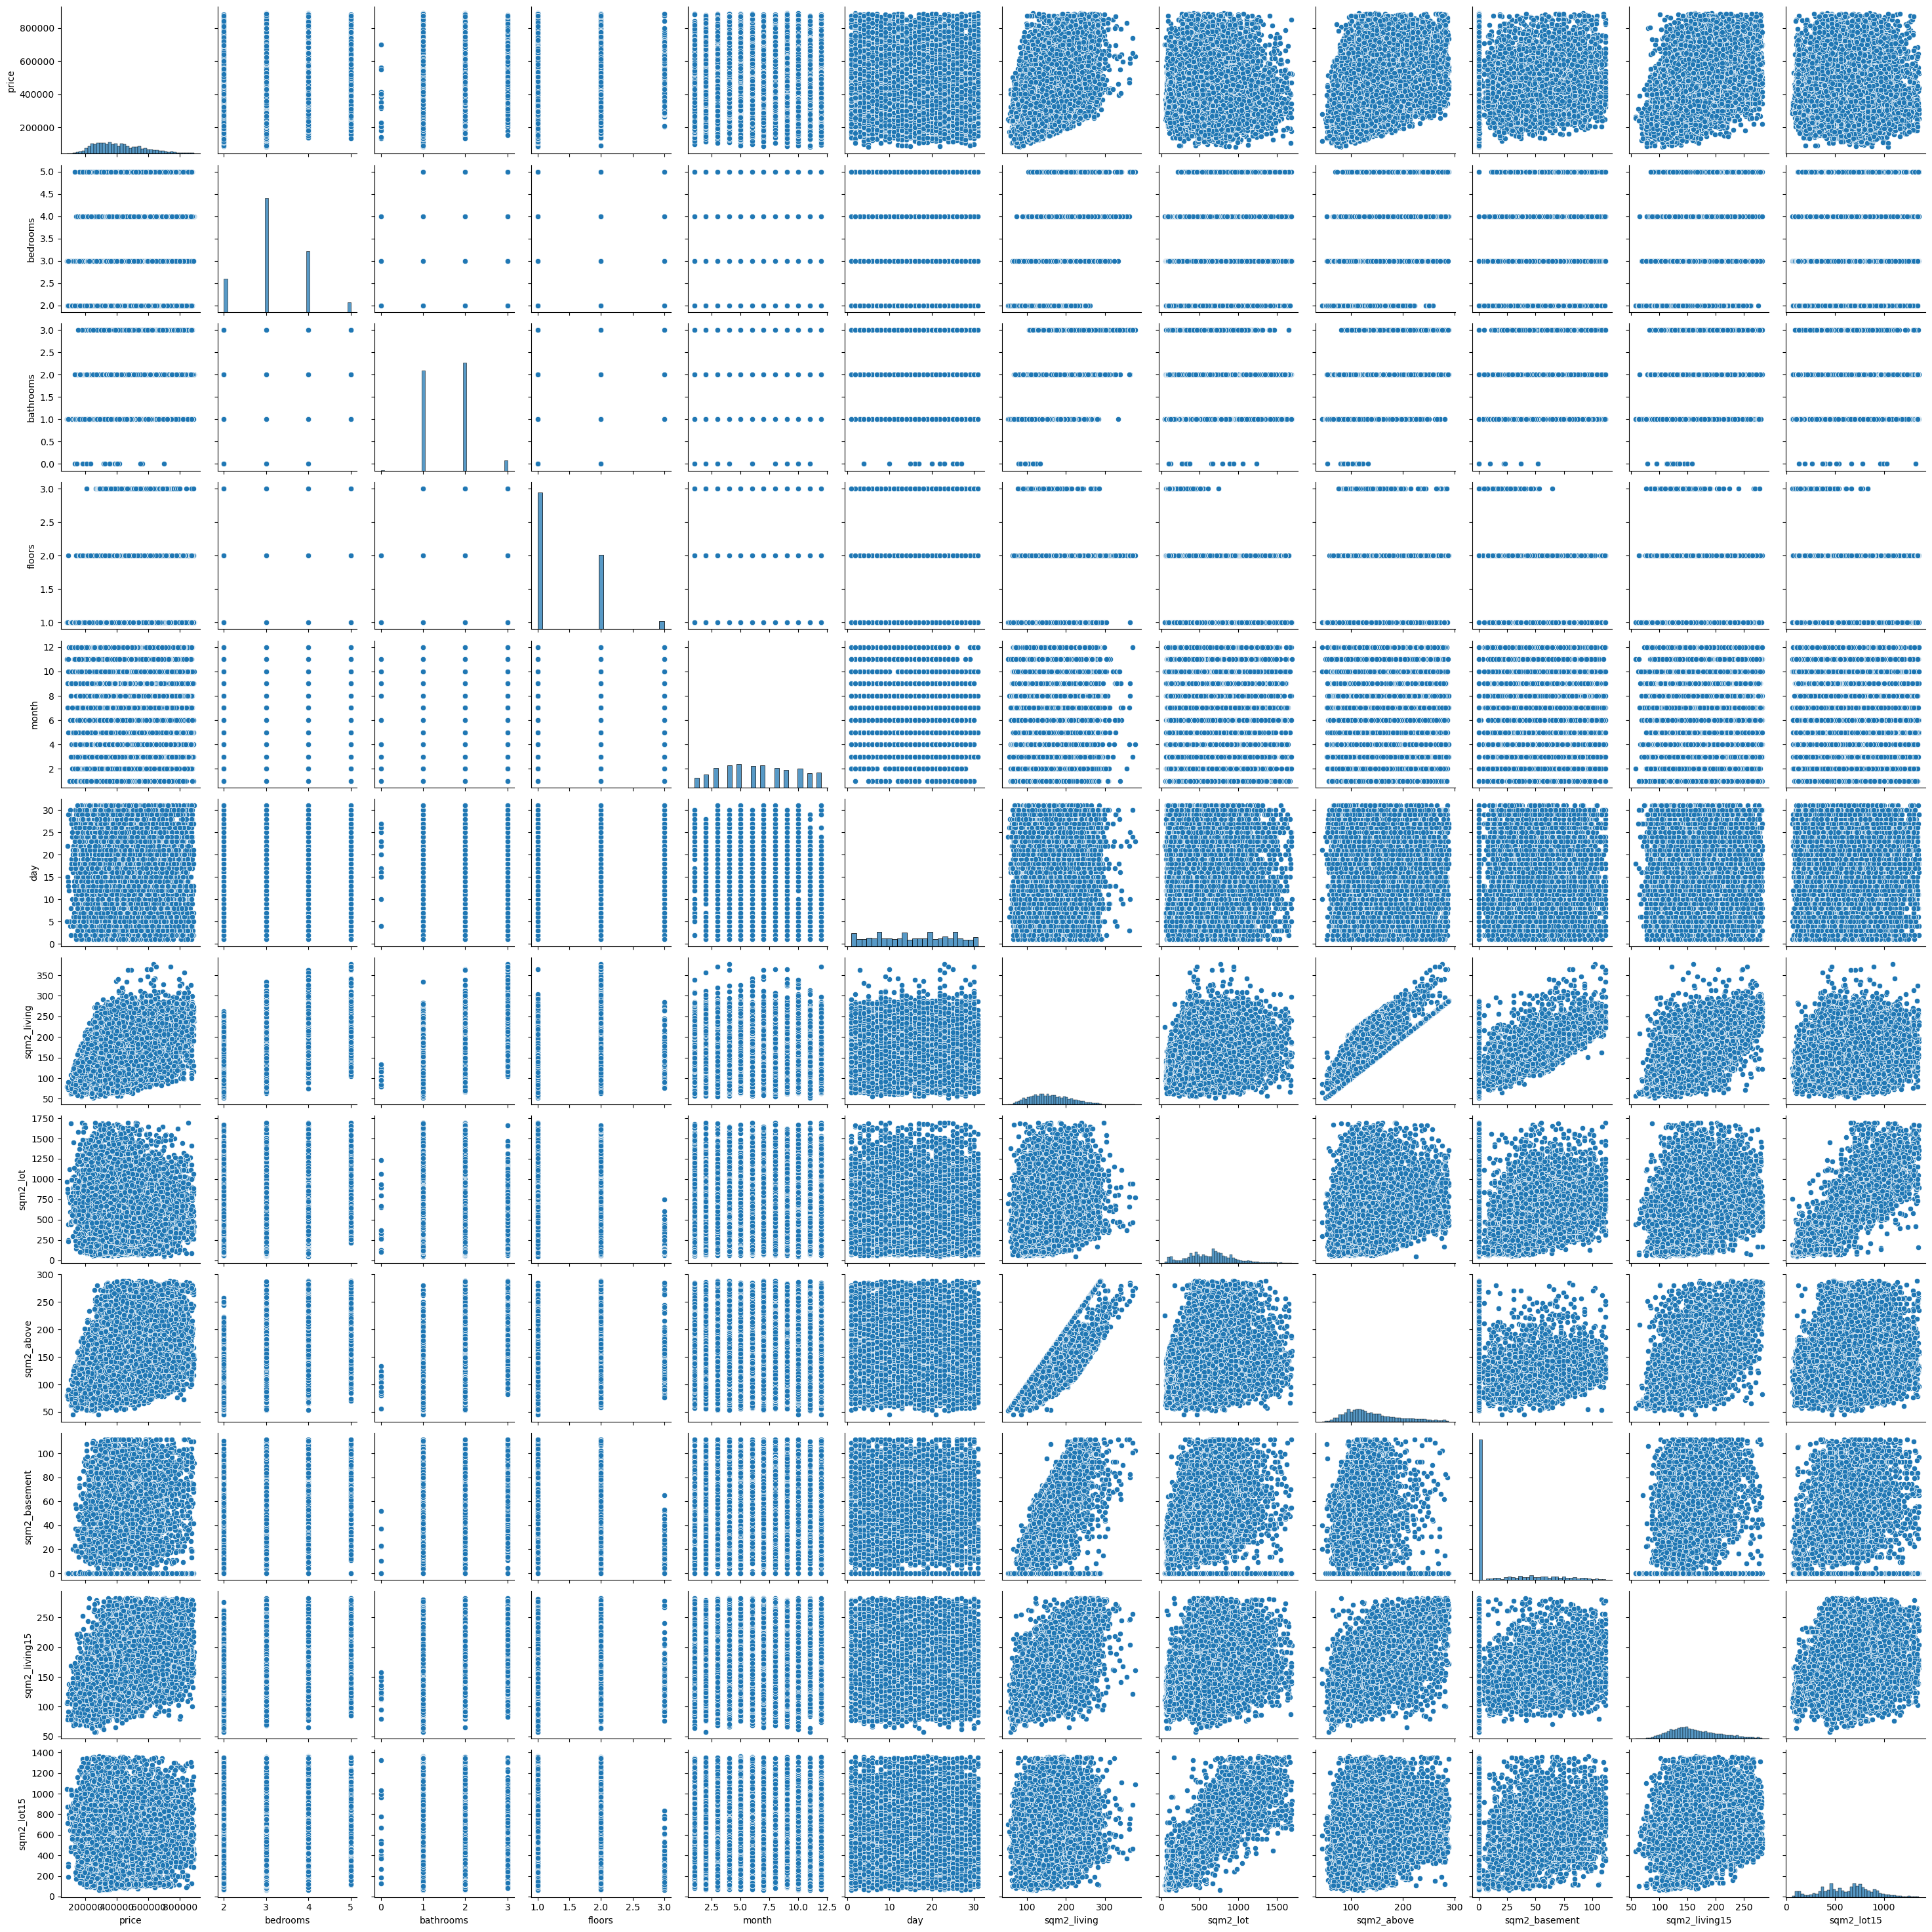

In [66]:
sns.pairplot(num_model)

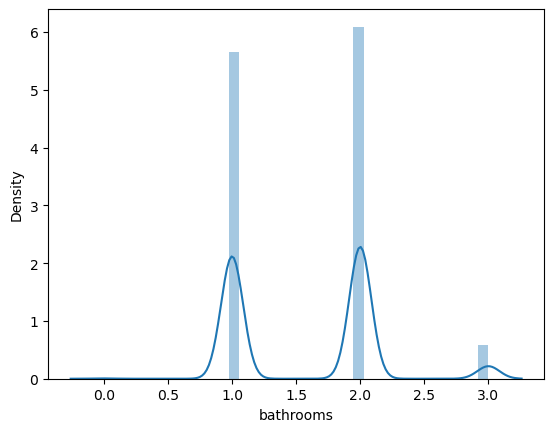

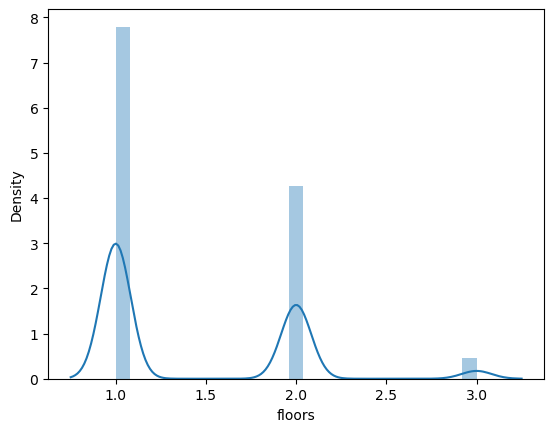

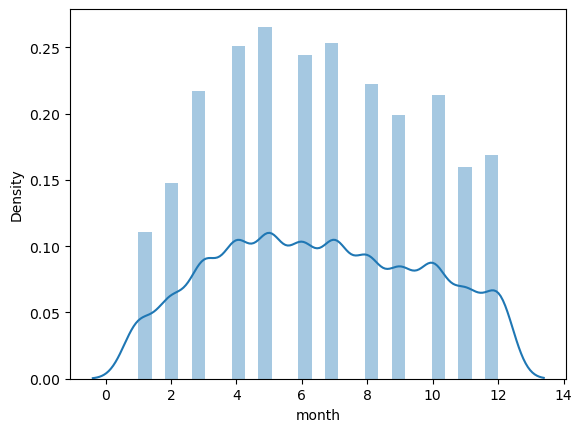

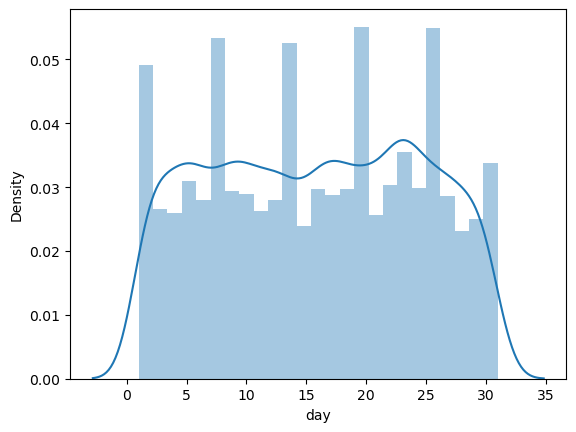

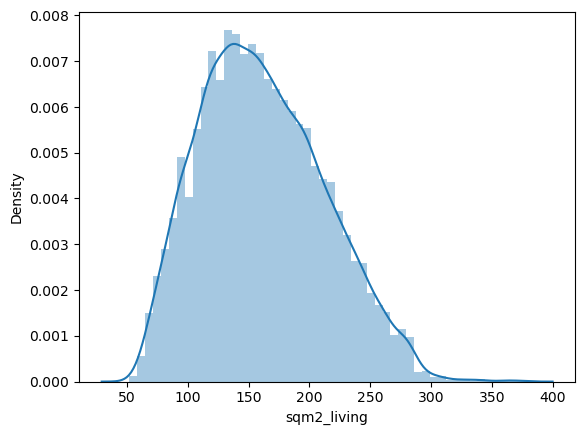

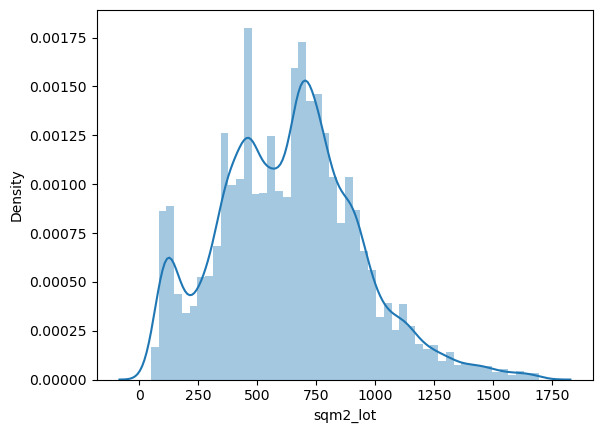

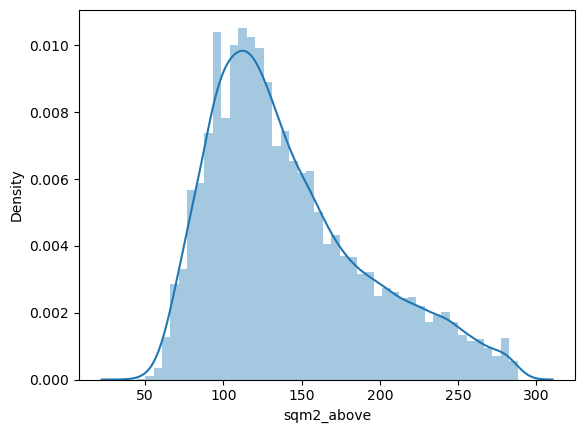

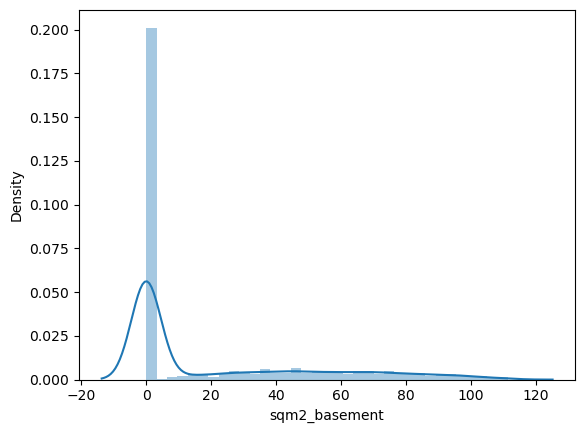

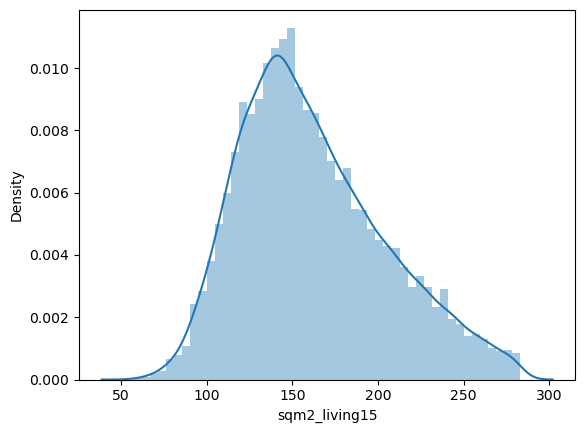

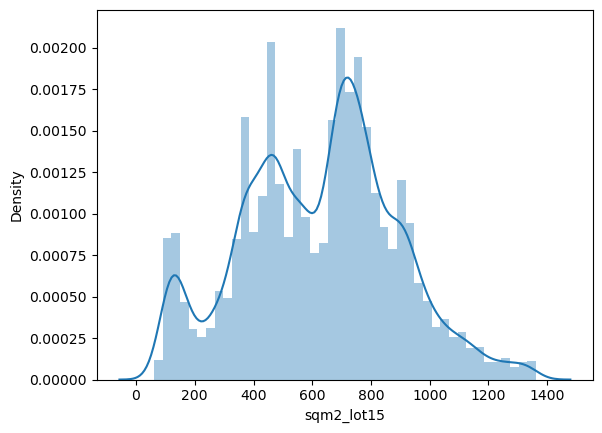

In [67]:
for column in num_model.columns:
    sns.distplot(num_model[column])
    plt.show()

In [68]:
num_model_corr = num_model.corr()
num_model_corr = round(num_model_corr,2)
num_model_corr

price  bedrooms  bathrooms  floors  month   day  sqm2_living  \
price           1.00      0.19       0.25    0.17  -0.02 -0.03         0.46   
bedrooms        0.19      1.00       0.35    0.08   0.00 -0.01         0.60   
bathrooms       0.25      0.35       1.00    0.52   0.02  0.01         0.55   
floors          0.17      0.08       0.52    1.00   0.01 -0.01         0.30   
month          -0.02      0.00       0.02    0.01   1.00 -0.07         0.02   
day            -0.03     -0.01       0.01   -0.01  -0.07  1.00         0.00   
sqm2_living     0.46      0.60       0.55    0.30   0.02  0.00         1.00   
sqm2_lot       -0.12      0.21      -0.14   -0.41  -0.01  0.01         0.16   
sqm2_above      0.34      0.47       0.51    0.50   0.01  0.01         0.82   
sqm2_basement   0.20      0.23       0.09   -0.32   0.01 -0.01         0.33   
sqm2_living15   0.39      0.39       0.41    0.26   0.00 -0.00         0.70   
sqm2_lot15     -0.14      0.21      -0.14   -0.41  -0.01  0.02         0.15   

               sqm2_lot  sqm2_above  sqm2_basement  sqm2_living15  sqm2_lot15  
price             -0.12        0.34           0.20           0.39       -0.14  
bedrooms           0.21        0.47           0.23           0.39        0.21  
bathrooms         -0.14        0.51           0.09           0.41       -0.14  
floors            -0.41        0.50          -0.32           0.26       -0.41  
month             -0.01        0.01           0.01           0.00       -0.01  
day                0.01        0.01          -0.01          -0.00        0.02  
sqm2_living        0.16        0.82           0.33           0.70        0.15  
sqm2_lot           1.00        0.11           0.08           0.19        0.88  
sqm2_above         0.11        1.00          -0.28           0.68        0.10  
sqm2_basement      0.08       -0.28           1.00           0.06        0.08  
sqm2_living15      0.19        0.68           0.06           1.00        0.21  
sqm2_lot15         0.88        0.10           0.08           0.21        1.00

<Figure size 1000x1000 with 0 Axes>

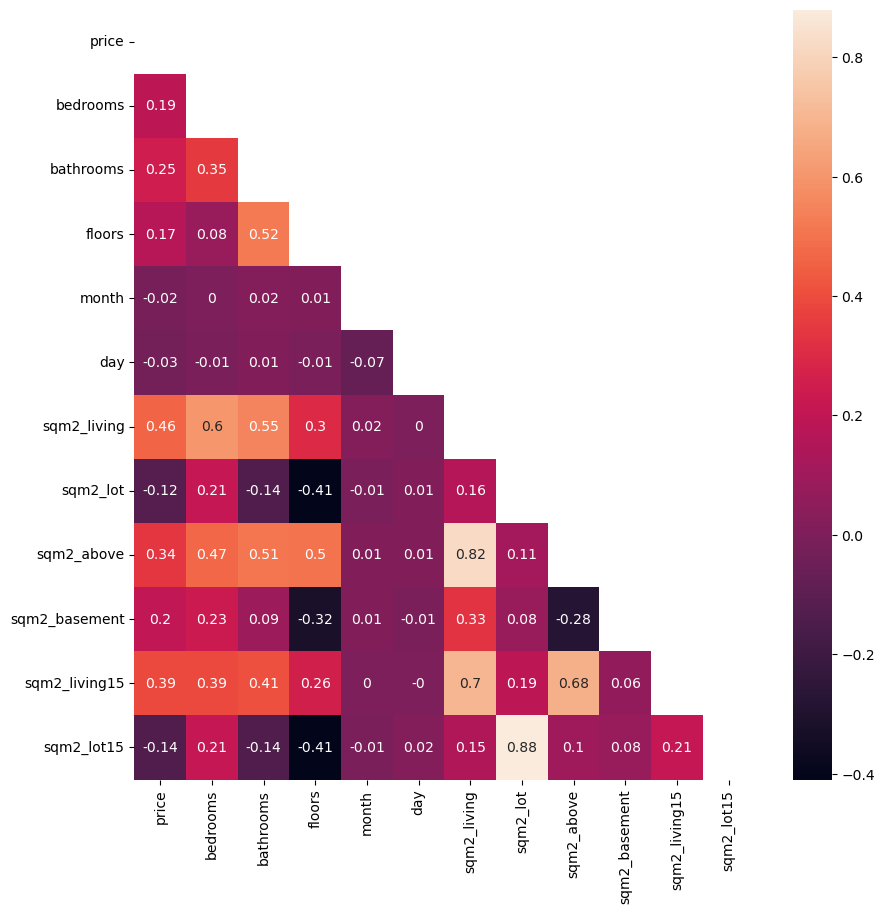

In [69]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_model_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(num_model_corr, mask=mask, annot=True)
plt.show()

In [70]:
num_model = num_model.drop(["sqm2_above"], axis = 1)
num_model.head()

price  bedrooms  bathrooms  floors  month  day  sqm2_living  sqm2_lot  \
0  221900         3          1       1     10   13        109.6     524.9   
2  180000         2          1       1      2   25         71.5     929.0   
3  604000         4          3       1     12    9        182.1     464.5   
4  510000         3          2       1      2   18        156.1     750.7   
6  257500         3          2       2      6   27        159.3     633.5   

   sqm2_basement  sqm2_living15  sqm2_lot15  
0            0.0          124.5       524.9  
2            0.0          252.7       749.0  
3           84.5          126.3       464.5  
4            0.0          167.2       697.0  
6            0.0          207.9       633.5

In [71]:
num_model_corr = num_model.corr()
num_model_corr = round(num_model_corr,2)
num_model_corr

price  bedrooms  bathrooms  floors  month   day  sqm2_living  \
price           1.00      0.19       0.25    0.17  -0.02 -0.03         0.46   
bedrooms        0.19      1.00       0.35    0.08   0.00 -0.01         0.60   
bathrooms       0.25      0.35       1.00    0.52   0.02  0.01         0.55   
floors          0.17      0.08       0.52    1.00   0.01 -0.01         0.30   
month          -0.02      0.00       0.02    0.01   1.00 -0.07         0.02   
day            -0.03     -0.01       0.01   -0.01  -0.07  1.00         0.00   
sqm2_living     0.46      0.60       0.55    0.30   0.02  0.00         1.00   
sqm2_lot       -0.12      0.21      -0.14   -0.41  -0.01  0.01         0.16   
sqm2_basement   0.20      0.23       0.09   -0.32   0.01 -0.01         0.33   
sqm2_living15   0.39      0.39       0.41    0.26   0.00 -0.00         0.70   
sqm2_lot15     -0.14      0.21      -0.14   -0.41  -0.01  0.02         0.15   

               sqm2_lot  sqm2_basement  sqm2_living15  sqm2_lot15  
price             -0.12           0.20           0.39       -0.14  
bedrooms           0.21           0.23           0.39        0.21  
bathrooms         -0.14           0.09           0.41       -0.14  
floors            -0.41          -0.32           0.26       -0.41  
month             -0.01           0.01           0.00       -0.01  
day                0.01          -0.01          -0.00        0.02  
sqm2_living        0.16           0.33           0.70        0.15  
sqm2_lot           1.00           0.08           0.19        0.88  
sqm2_basement      0.08           1.00           0.06        0.08  
sqm2_living15      0.19           0.06           1.00        0.21  
sqm2_lot15         0.88           0.08           0.21        1.00

<Figure size 1000x1000 with 0 Axes>

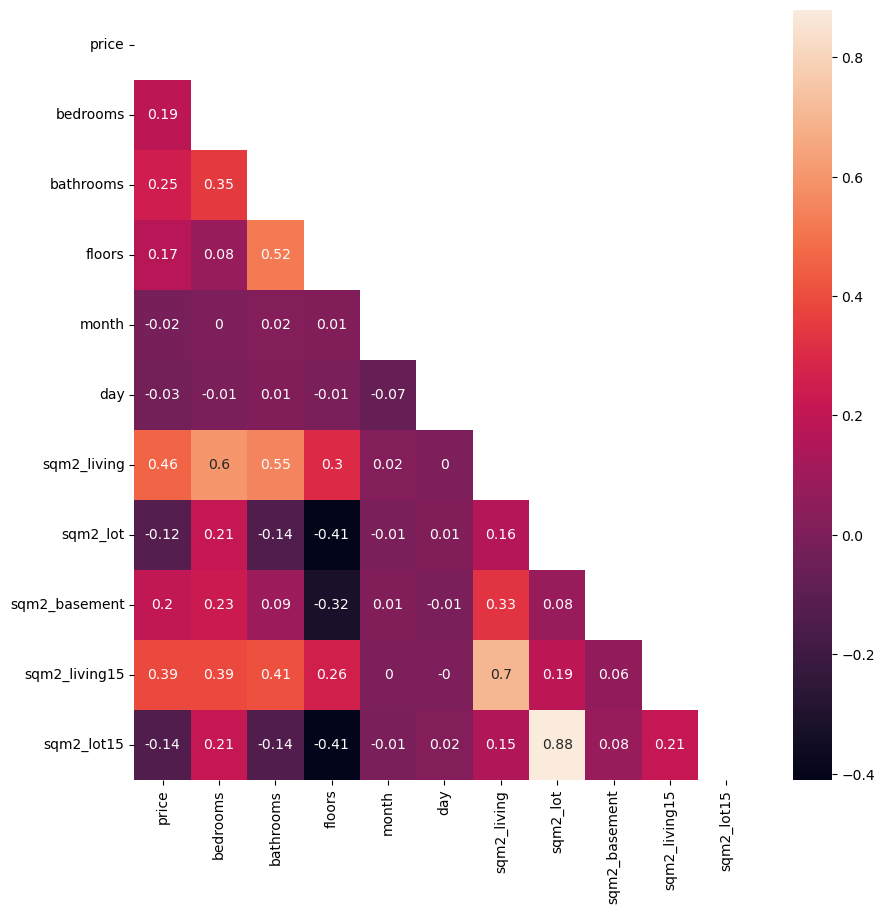

In [72]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_model_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(num_model_corr, mask=mask, annot=True)
plt.show()

In [73]:
disc_num

bedrooms  bathrooms  floors  month  day
0             3          1       1     10   13
2             2          1       1      2   25
3             4          3       1     12    9
4             3          2       1      2   18
6             3          2       2      6   27
...         ...        ...     ...    ...  ...
21592         3          2       3      5   21
21593         4          2       2      2   23
21594         2          0       2      6   23
21595         3          2       2      1   16
21596         2          0       2     10   15

[13937 rows x 5 columns]

In [74]:
cont_num = cont_num.drop(["price", "sqm2_above"], axis = 1)
cont_num

sqm2_living  sqm2_lot  sqm2_basement  sqm2_living15  sqm2_lot15
0            109.6     524.9            0.0          124.5       524.9
2             71.5     929.0            0.0          252.7       749.0
3            182.1     464.5           84.5          126.3       464.5
4            156.1     750.7            0.0          167.2       697.0
6            159.3     633.5            0.0          207.9       633.5
...            ...       ...            ...            ...         ...
21592        142.1     105.1            0.0          142.1       140.2
21593        214.6     540.0            0.0          170.0       668.9
21594         94.8     125.4            0.0           94.8       186.5
21595        148.6     221.9            0.0          131.0       119.6
21596         94.8     100.0            0.0           94.8       126.1

[13937 rows x 5 columns]

In [75]:
transformer = MinMaxScaler().fit(cont_num) 
x_minmax = transformer.transform(cont_num) 
print(x_minmax.shape)

(13937, 5)


In [76]:
cont_norm = pd.DataFrame(x_minmax,index = cont_num.index, columns=cont_num.columns)
cont_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13937 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqm2_living    13937 non-null  float64
 1   sqm2_lot       13937 non-null  float64
 2   sqm2_basement  13937 non-null  float64
 3   sqm2_living15  13937 non-null  float64
 4   sqm2_lot15     13937 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB


In [77]:
cont_norm.head()

sqm2_living  sqm2_lot  sqm2_basement  sqm2_living15  sqm2_lot15
0     0.177122  0.289339       0.000000       0.296937    0.356846
2     0.059963  0.534665       0.000000       0.865957    0.529046
3     0.400062  0.252671       0.757848       0.304927    0.310435
4     0.320111  0.426421       0.000000       0.486462    0.489089
6     0.329951  0.355270       0.000000       0.667111    0.440295

In [78]:
model_conc = pd.concat([disc_num, cont_norm, cat_model], axis = 1)
model_conc.head()

bedrooms  bathrooms  floors  month  day  sqm2_living  sqm2_lot  \
0         3          1       1     10   13     0.177122  0.289339   
2         2          1       1      2   25     0.059963  0.534665   
3         4          3       1     12    9     0.400062  0.252671   
4         3          2       1      2   18     0.320111  0.426421   
6         3          2       2      6   27     0.329951  0.355270   

   sqm2_basement  sqm2_living15  sqm2_lot15  waterfront  condition  grade  \
0       0.000000       0.296937    0.356846           0          3      7   
2       0.000000       0.865957    0.529046           0          3      6   
3       0.757848       0.304927    0.310435           0          5      7   
4       0.000000       0.486462    0.489089           0          3      8   
6       0.000000       0.667111    0.440295           0          3      7   

   viewed_or_not  ren_or_not  bigger_living_or_not  bigger_lot_or_not  
0              0           0                     1                  0  
2              0           0                     1                  0  
3              0           0                     0                  0  
4              0           0                     1                  0  
6              0           0                     1                  0

In [79]:
X = model_conc
y = target

In [80]:
len(model_conc)

13937

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [82]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [83]:
pred = model.predict(X_test)
pred.shape

(4182,)

In [84]:
R2 = r2_score(y_test, pred)
adj_r2 = (1 - (1 - R2) * ((X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)))
RMSE = mean_squared_error(y_test, pred, squared=False)
MSE = mean_squared_error(y_test, pred)
print("r2 = ", R2)
print("adjusted r2 = ", adj_r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.37679163441543684
adjusted r2 =  0.3760304775640153
RMSE =  127010.80399684329
MSE =  16131744331.924543


In [85]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = pred
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true           pred           diff
3635   200000  296524.903369   96524.903369
1994   194000  244750.112502   50750.112502
6818   220000  386089.522281  166089.522281
3894   450000  475794.828648   25794.828648
2937   335000  400224.180409   65224.180409
...       ...            ...            ...
10342  385000  528633.889684  143633.889684
2122   800000  526757.906421  273242.093579
5154   420000  635374.889160  215374.889160
6574   470000  513746.704480   43746.704480
2794   430000  381924.450358   48075.549642

[4182 rows x 3 columns]

In [86]:
results.sort_values('diff', ascending=False).head(10)

true           pred           diff
19321  874950  381847.383234  493102.616766
14112  875000  394439.551098  480560.448902
12274  815000  340421.400759  474578.599241
18589  815000  347765.320162  467234.679838
3784   816000  374059.786549  441940.213451
9285   826000  387988.767258  438011.232742
18160  818900  393361.462856  425538.537144
13622  765000  342131.189893  422868.810107
8776   790000  384130.132713  405869.867287
1626   880000  475836.723585  404163.276415

In [87]:
sns.regplot(results['true'], results['pred'])

<AxesSubplot:xlabel='true', ylabel='pred'>